# Feature Engineering
<center><img src="./images/Engineering.jpg" alt="Engineering" style="width: 800px;"/></center>

### Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.
... according to Wikipedia.org.  
  
Typially an iterative process where new features are generated and tested, e.g. batch-wise.

## Motivation
- GIGO - garbage in, garbage out
- Machine Learning methods are limited, cannot make gold from lead
- Domain knowledge and random or exhaustive feature engineering can unlock patterns hidden from the models


### Example: Kaggle competiton/tutorial - Titanic survival
- Has been compulsory assignment in DAT200
- Few complete features, missing data
- Some information needs decoding, e.g. titles from names
- Combining features smartly wastly increases accuracy

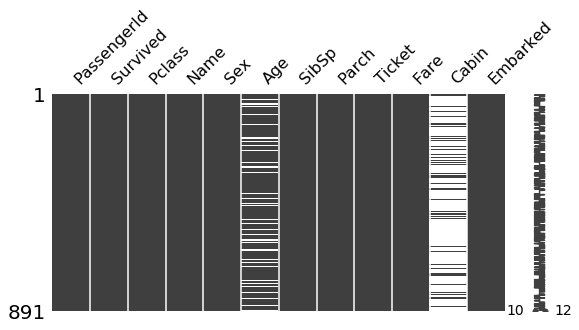

In [30]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv('./data/Titanic_Train.csv')
ms.matrix(train_data, figsize=[9,4])
plt.show()

### A standard machine learning pipeline
<img src="./images/Pipeline.png" alt="Typical Pipeline"/>  
Source: Practical Machine Learning with Python, Apress/Springer

## The process of feature engineering (traditionally):
1. Brainstorming or Testing features;
2. Deciding what features to create;
3. Creating features;
4. Checking how the features work with your model;
5. Improving your features if needed;
6. Go back to brainstorming/creating more features until the work is done.


### 3. Creating features
- Should expand the feature space, preferrably in a non-linear fashion.
- Simple linear combinations typically do not add anything new.
- Polynomial features.
    - Interactions (products / quotients).
- Non-linear functions of single features or feature combinations
- Transformations:
    - log
    - Box-Cox (typically for non-normally distributed data)
<img src="./images/Box_Cox.png" alt="Box-Cox transformation" style="width: 300px;"/>

--------------- End of first lecture -----------------

## Terms from Machine Learning
- Feature combinations/crossing
  - Combinations that cannot be represented by the linear system, e.g. ReLU and friends.
- Feature bucketing
  - Create major categories from continuous or multi class data.
  - https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization.html -> Colab
- Feature templates
  - Implicit generation of new features in a model, or
  - A group of features all computed in a similar way.
      - Length greater than ...
      - Last three characters equals ...
      - Contains character ...
- Feature hashing
  - Use hashing algorithms to create vectors/matrices from complicated predictors.
  - F.ex. dictionary type terms where the vocabulary may grow.
 

### scikit-learn's pre-processing
- Non-linear transformation by quantiles
- Binarization
    - 0 or not (1)
- OneHot encoding
    - Multiple 0 or 1

http://scikit-learn.org/stable/modules/preprocessing.html

### Feature representation
- Re-code timestamps to:
    - day of the year
    - time of day
    - minutes since some event
    - https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [31]:
import pandas as pd
two_dates = pd.to_datetime(['2018-07-29', '2018-07-30'])
print(two_dates)
print(two_dates.values.astype('datetime64[m]') + 1)
print(two_dates.values+1)

DatetimeIndex(['2018-07-29', '2018-07-30'], dtype='datetime64[ns]', freq=None)
['2018-07-29T00:01' '2018-07-30T00:01']
['2018-07-29T00:00:00.000000001' '2018-07-30T00:00:00.000000001']


### Feature representation
- Switch between numeric and categorical/ordinal
    - Length of education => Achieved degree

In [46]:
"""
# EXERCISE: Recode list of integers into list of degrees
Assume the following (only integers):
    - <3 years => Course shopper
    -  3 years => Bachelor
    -  5 years => Master
    -  8 years => Ph.D.
    - 13 years => Overtime
"""
eduLength = [3,5,1,3,6,7,4,2,6,8,9,4,2,6,9]
degrees = {'Course shopper':1, 'Bachelor':3, 'Master':5, 'Ph.D.':8, 'Overtime':13}

# Teacher's solution will include Pandas' cut, i.e. pd.cut()
import pandas as pd
def yearDegreePD(years, degrees):
    return(pd.cut(years, 
                  list(degrees.values()), 
                  right=False, 
                  labels=list(degrees.keys())[:-1]).get_values())
yearDegreePD(eduLength, degrees)

array(['Bachelor', 'Master', 'Course shopper', 'Bachelor', 'Master',
       'Master', 'Bachelor', 'Course shopper', 'Master', 'Ph.D.', 'Ph.D.',
       'Bachelor', 'Course shopper', 'Master', 'Ph.D.'], dtype=object)

### External data
- Time series:
    - Connect events on time points
- External APIs: 
    - E.g. Microsoft Computer Vision to count faces in an image (free Azure subscription avilable)
- Geocoding:
    - Convert between street addresses, coordinates, etc.
    - Connect to external data sources based on coordinates

## Rectified Linear Units - ReLU
$f(x)=x^+=max(0,x)$  
  
Non-linear activation function / transformed feature.  
Simple derivative except a discontinuity in 0 $\Rightarrow$ good candidate for activation function in deep neural networks.

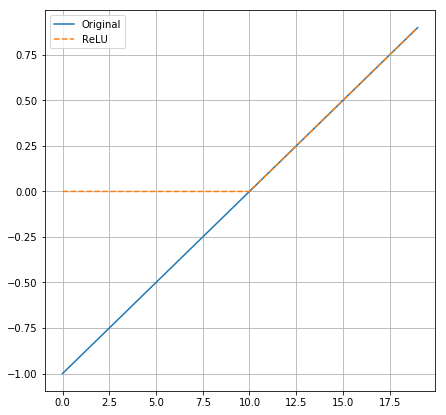

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def ReLU(x):
    x[x<0] = 0

# Plot effect on straight line
y = np.arange(-1,1,0.1)
fig = plt.figure(figsize=[7,7])
plt.plot(y, label='Original')
ReLU(y)
plt.plot(y, '--', label='ReLU')
plt.legend()
plt.grid()
plt.show()

### Variants
Soft truncation of $x<0$. In deep neural networks this can help against "dead neurons" where a neuron is perpetually inactive. $a$ below is a hyperparameter.  
  
Leaky ReLU:  
$f(x)=max(ax,x)$, for $0 < a < 1$.  
  
Exponential linear unit (ELU):  
$f(x)=max(a(e^x-1),x)$, for $0 < a$.

In [48]:
def LeakyReLU(x, a):
    x[x<0] = a*x[x<0]

def ELU(x, a):
    x[x<0] = a*(np.exp(x[x<0])-1)

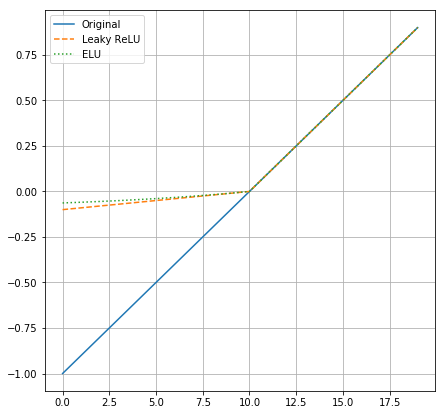

In [49]:
# Plot effect on straight line
y = np.arange(-1,1,0.1)
fig = plt.figure(figsize=[7,7])
plt.plot(y, label='Original')
LeakyReLU(y,0.1)
plt.plot(y, '--', label='Leaky ReLU')
y = np.arange(-1,1,0.1)
ELU(y,0.1)
plt.plot(y, ':', label='ELU')
plt.legend()
plt.grid()
plt.show()

### Example
Random normal data.

In [50]:
y = np.sort(np.random.normal(size=[500,1]))
yReLU  = y.copy()
yLReLU = y.copy()
yELU   = y.copy()

ReLU(yReLU)
LeakyReLU(yLReLU,0.25)
ELU(yELU,0.25)

#### Plot sorted values

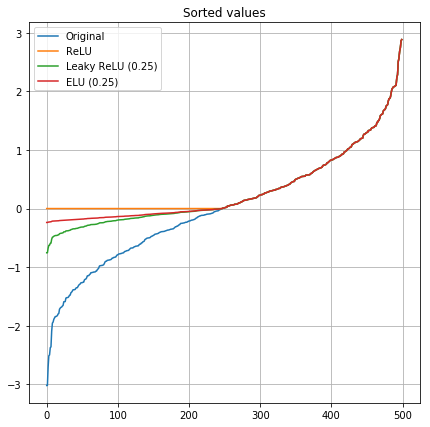

In [51]:
fig = plt.figure(figsize=[7,7])
plt.plot(sorted(y), label='Original')
plt.plot(sorted(yReLU), label = 'ReLU')
plt.plot(sorted(yLReLU), label = 'Leaky ReLU (0.25)')
plt.plot(sorted(yELU), label = 'ELU (0.25)')
plt.legend()
plt.grid()
plt.title('Sorted values')
plt
plt.show()

## ReLU on differences
ReLU can also be calcualted on feature combinations, e.g. differences between features, either in a systematic or random way:  
  
$f(x_i,x_j)=(x_i-x_j)^+=max(0,x_i-x_j)$  
  
Added to the original values, these can greatly increase the available feature space for regression or classification methods.
  
![Homer the chef](./images/Bilde1.gif "Homer the chef")  

### Example with MNIST handwritten digits
Perform Logistic Regression with original (scaled) data and data augmented with all pair-wise ReLU'ed differences between pixels.

In [52]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
# Pixels as an array
data = digits.data
# Classification target (digits)
target = digits['target']

# Split data
x_train, x_test, y_train, y_test = \
       train_test_split(data, target, 
                        test_size=0.3,
                        random_state=1)
LR = LogisticRegression(penalty='l2', random_state=1)

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=LR, 
                X=x_train, 
                y=y_train, 
                param_name='C', # The paramter to vary
                param_range=param_range, # ... and its values
                cv=5) # Stratified KFold by default

C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

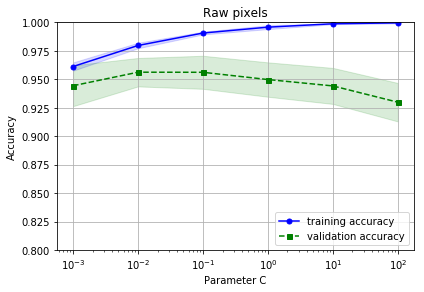

In [53]:
# Calculate validation curves for training and test sets
train_mean = np.mean(train_scores, axis=1); train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1);   test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.title('Raw pixels')
plt.show()

#### Augmented with ReLU

In [54]:
from scipy.special import comb

# Systematic differences between all columns of X
def all_differences(X):
    n, n_pred = X.shape
    j = 0
    n_left = n_pred-1
    B = np.zeros([n, comb(n_pred,2,True)]);
    for i in range(n_pred):
        B[:,j+np.arange(n_left)] = X[:,i+1:] - X[:,i,None] # Avoid collapse with None
        j += n_left;
        n_left -= 1;
    return B

In [55]:
diff_data = all_differences(data)
ReLU(diff_data)
data_augmented = np.hstack([data, diff_data])
print(data.shape)
print(data_augmented.shape)

(1797, 64)
(1797, 2080)


In [56]:
print(np.linalg.matrix_rank(data))
print(np.linalg.matrix_rank(data_augmented))

61
1382


In [57]:
# Split data
x_train_aug, x_test_aug, y_train, y_test = \
       train_test_split(data_augmented, target, 
                        test_size=0.3,
                        random_state=1)
LR = LogisticRegression(penalty='l2', random_state=1)

# Cross-validate various L2 parameter values 
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores_aug, test_scores_aug = validation_curve(
                estimator=LR, 
                X=x_train_aug, 
                y=y_train, 
                param_name='C', # The paramter to vary
                param_range=param_range, # ... and its values
                cv=5) # Stratified KFold by default

C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

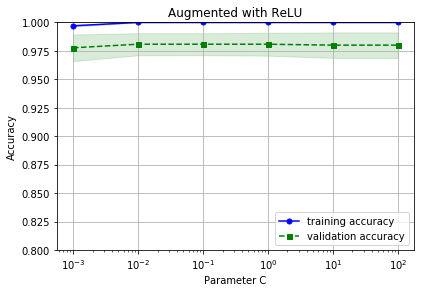

In [58]:
# Calculate validation curves for training and test sets
train_mean_aug = np.mean(train_scores_aug, axis=1); train_std_aug  = np.std(train_scores_aug, axis=1)
test_mean_aug  = np.mean(test_scores_aug, axis=1);  test_std_aug   = np.std(test_scores_aug, axis=1)

plt.plot(param_range, train_mean_aug, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean_aug + train_std_aug,
                 train_mean_aug - train_std_aug, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean_aug, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                 test_mean_aug + test_std_aug,
                 test_mean_aug - test_std_aug, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.title('Augmented with ReLU')
plt.show()

In [59]:
print('Maximum accuracy:')
print('Original data: {0:.3f}'.format(max(test_mean)))
print('Augmented data: {0:.3f}'.format(max(test_mean_aug)))

Maximum accuracy:
Original data: 0.956
Augmented data: 0.981


#### Double augmented

In [60]:
diff_data = np.hstack([all_differences(data),-all_differences(data)])
ReLU(diff_data)
data_augmented2 = np.hstack([data, diff_data])
print(data.shape)
print(data_augmented.shape)

(1797, 64)
(1797, 2080)


In [ ]:
# Split data
x_train_aug2, x_test_aug2, y_train, y_test = \
       train_test_split(data_augmented2, target, 
                        test_size=0.3,
                        random_state=1)
LR = LogisticRegression(penalty='l2', random_state=1)

# Cross-validate various L2 parameter values (almost 2 minutes on teacher's computer)
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores_aug2, test_scores_aug2 = validation_curve(
                estimator=LR, 
                X=x_train_aug2, 
                y=y_train, 
                param_name='C', # The paramter to vary
                param_range=param_range, # ... and its values
                cv=5) # Stratified KFold by default

C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\NMBU\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

In [ ]:
# Calculate validation curves for training and test sets
train_mean_aug2 = np.mean(train_scores_aug2, axis=1); train_std_aug2  = np.std(train_scores_aug2, axis=1)
test_mean_aug2  = np.mean(test_scores_aug2, axis=1);  test_std_aug2   = np.std(test_scores_aug2, axis=1)

plt.plot(param_range, train_mean_aug2, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean_aug2 + train_std_aug2,
                 train_mean_aug2 - train_std_aug2, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean_aug2, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(param_range, 
                 test_mean_aug2 + test_std_aug2,
                 test_mean_aug2 - test_std_aug2, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.title('Augmented twice')
plt.show()

In [ ]:
print('Maximum cross-validation accuracy:')
print('Original data: {0:.3f}'.format(max(test_mean)))
print('Augmented data: {0:.3f}'.format(max(test_mean_aug)))
print('Double augmented data: {0:.3f}'.format(max(test_mean_aug2)))

### Test set classifications

In [ ]:
# Original
LR.C = param_range[np.argmax(test_mean)]
LR.fit(x_train, y_train)
accuracy = LR.score(x_test,y_test)

# Augmented
LR.C = param_range[np.argmax(test_mean_aug)]
LR.fit(x_train_aug, y_train)
accuracy_aug = LR.score(x_test_aug,y_test)

# Double augmented
LR.C = param_range[np.argmax(test_mean_aug2)]
LR.fit(x_train_aug2, y_train)
accuracy_aug2 = LR.score(x_test_aug2,y_test)

print('Maximum test set accuracy')
print('Original data: {0:.3f}'.format(accuracy))
print('Augmented data: {0:.3f}'.format(accuracy_aug))
print('Double augmented data: {0:.3f}'.format(accuracy_aug2))

### Bucketing

In [4]:
## Custom bucketing
import pandas as pd
import numpy as np
df = pd.DataFrame({'normal': np.random.normal(10, 3, 1000)})
print(df.describe().T); print()

custom_bucket_array = np.linspace(0, 20, 9)
custom_bucket_array = [0, 10, 15, 20]
df['bucket'] = pd.cut(df['normal'], custom_bucket_array)
print(custom_bucket_array);print()
print(df.head())

         count      mean       std       min      25%        50%        75%  \
normal  1000.0  10.09538  2.981803  1.423397  8.03124  10.061142  12.236073   

              max  
normal  19.806861  

[0, 10, 15, 20]

      normal    bucket
0   9.450831   (0, 10]
1   7.833391   (0, 10]
2  12.587823  (10, 15]
3   9.687477   (0, 10]
4   7.298051   (0, 10]


## Automatized feature engineering:
- Deep Feature Synthesis (MIT)
- OneBM (IBM)
- ExploreKit (Berkeley)
<img src="./images/DFS.png" alt="Deep feature syntehsis" style="width: 300px;" align="center" />

Deep Feature Synthesis is available in Python through Featuretools:
- automatic feature engineering for relational and timestamped data
  - e.g. database exports with common keys, time aspect, ...
- mimics human made feature combinations and transformations

Deep Feature Synthesis:
- aggregate data from one table and merge into another (one-to-many relation),  
  e.g. sum, std., max, min., mean, count, percent true, num unique, mode, trend, skew, custom (agg_primitives)
- transformations in the primary data table (trans_primitives)
- combinations of the above
- aggregation of aggregations (depth = 2, deep feature), and deeper (harder to interpret)

### Example using single DataFrame

- Iris data
    - Three species, four attributes
- No relational database or time series

In [5]:
from sklearn.datasets import load_iris
import pandas as pd
import featuretools as ft

# Load data and put into dataframe
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Make an entityset and add the entity
es = ft.EntitySet(id = 'iris')
es.entity_from_dataframe(entity_id = 'data', dataframe = df, 
                         make_index = True, index = 'index')

Entityset: iris
  Entities:
    data [Rows: 150, Columns: 6]
  Relationships:
    No relationships

In [7]:
# List of available primitives
ft.list_primitives()

,name,type,description
0,n_most_common,aggregation,Determines the `n` most common elements.
1,std,aggregation,Computes the dispersion relative to the mean v...
2,mean,aggregation,Computes the average for a list of values.
3,mode,aggregation,Determines the most commonly repeated value.
4,count,aggregation,"Determines the total number of values, excludi..."
5,trend,aggregation,Calculates the trend of a variable over time.
6,time_since_first,aggregation,Calculates the time elapsed since the first da...
7,num_unique,aggregation,"Determines the number of distinct values, igno..."
8,last,aggregation,Determines the last value in a list.
9,time_since_last,aggregation,Calculates the time elapsed since the last dat...


In [8]:
# Run deep feature synthesis with transformation primitives
feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',
                                      trans_primitives = ['add_numeric', 'multiply_numeric'])#, max_depth=2)
feature_matrix.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'petal width (cm) + sepal length (cm)',
       'sepal length (cm) + sepal width (cm)',
       'petal length (cm) + petal width (cm)',
       'petal length (cm) + sepal length (cm)',
       'petal width (cm) + sepal width (cm)',
       'petal length (cm) + sepal width (cm)',
       'petal length (cm) * petal width (cm)',
       'petal length (cm) * sepal width (cm)',
       'petal width (cm) * sepal length (cm)',
       'petal width (cm) * sepal width (cm)',
       'sepal length (cm) * sepal width (cm)',
       'petal length (cm) * sepal length (cm)',
       'petal length (cm) + sepal width (cm) * sepal width (cm)',
       'petal width (cm) + sepal width (cm) * sepal width (cm)',
       'petal length (cm) + petal width (cm) * petal length (cm) + sepal length (cm)',
       'petal width (cm) + sepal width (cm) * sepal length (cm) + sepal width (cm)',
       'petal length (cm) * petal

In [9]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(gamma='scale')
clf.fit(iris.data, df['species'].values)
clf.score(iris.data, df['species'].values)
cross_val_score(clf, iris.data, df['species'].values, cv=5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [10]:
clf = svm.SVC(gamma='scale')
clf.fit(feature_matrix.drop('species',axis=1).values, df['species'].values)
clf.score(feature_matrix.drop('species',axis=1).values, df['species'].values)
cross_val_score(clf, feature_matrix.drop('species',axis=1).values, df['species'].values, cv=5)

array([0.9       , 0.93333333, 0.9       , 0.93333333, 0.9       ])

## Example
#### Prediction of olympic medals
Browse the following:  
https://github.com/Featuretools/predict-olympic-medals/blob/master/PredictOlympicMedals.ipynb

## Box-Cox example
<img src="./images/Box_Cox.png" alt="Box-Cox transformation" style="width: 200px;"/>

In [11]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

non_normal = np.random.gamma(1, size=[600])
bc, param = ss.boxcox(non_normal)

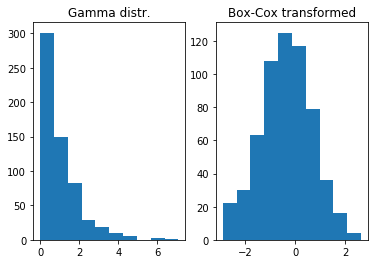

0.2862670776104834


In [12]:
# Plot
plt.subplot(1, 2, 1)
plt.hist(non_normal)
plt.title('Gamma distr.')
plt.subplot(1, 2, 2)
plt.hist(bc)
plt.title('Box-Cox transformed')
plt.show()
print(param)


## Encoder example

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

fishNchips = np.array(['fish','chips','fish','fish','chips','mayonnaise'])
print(fishNchips); print(' ')

fcIntegers = LabelEncoder().fit_transform(fishNchips) # Redundant for OHE in newer scikit-learn
print(fcIntegers); print(' ')

fcOneHot   = OneHotEncoder().fit_transform(fcIntegers[:,np.newaxis]).toarray()
print(fcOneHot)

['fish' 'chips' 'fish' 'fish' 'chips' 'mayonnaise']
 
[1 0 1 1 0 2]
 


C:\NMBU\Miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


## Polynomial example

In [14]:
from sklearn.preprocessing import PolynomialFeatures

someData = np.array([[1,2],[1,5],[0,2],[1,0],[3,1]])
print(someData); print(' ')
print(PolynomialFeatures(2).fit_transform(someData))

[[1 2]
 [1 5]
 [0 2]
 [1 0]
 [3 1]]
 
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  1.  5.  1.  5. 25.]
 [ 1.  0.  2.  0.  0.  4.]
 [ 1.  1.  0.  1.  0.  0.]
 [ 1.  3.  1.  9.  3.  1.]]


## Error analysis:
- Inspect some large errors
- Inspect class-wise
- Run clustering on errors to search for common patterns
- Ask a colleague or expert

## Summary
- Feature engineering has various definitions and supposed workflows/content
- Apply (non-linear) functions on original data
    - Direct transformations
    - Feature combinations
- Aim: Aid Machine Learning methods, unlock hidden patterns
- Deep feature synthesis
    - Automatic FE
    - Mainly for relational data(bases)
- Exercises in GitLab:
    - Flubby Flobs (detective work for recreating features)
    - Titanic survival (download from Kaggle to Colab, basic handling)